In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df= pd.read_csv('vgsales.csv')
df.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

In [157]:
df.info() #show data's info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [158]:
df.describe()

Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.470000  
max       10.570000     82.740000

## Data cleaning

In [159]:
print(df.isnull().sum()) #check the null values

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


From the code above, seen that there are two variables have many null values. Year and Publisher varaiables have 271 and 58 null values, respectively.

While our task is  to predict the Global_Sales, so We ignore the null values.

Then we can move to the next step of removing unnecessary columns. 
From dataset, we can observe that Rank column has no meaning in our dataset, so we remvoe it from the dataset

In [2]:
df.dropna(inplace=True)
df.drop('Rank', axis=1, inplace=True)
#df.drop(columns =['Rank','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1, inplace=True)

## Variables Correlation

<AxesSubplot:>

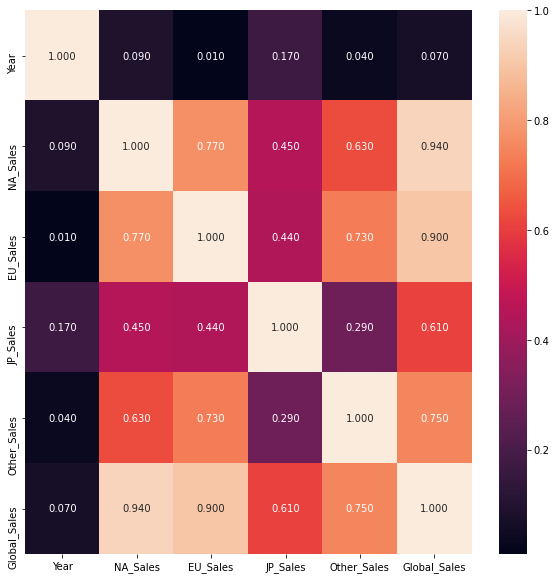

In [47]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr().abs().round(2),annot=True,fmt= '.3f')


The correlaion matrix above shows the correlation between numerical variables. As we can see the NA_Sales, EU_Sales, JP_Sales, and Other_Sales are the highest correlated with target variable Global_Sales, and even between each other, this expected because the value of Global_Sales is the summtion of the these variables.
There is very weak correclation between Year and other numeric variables. 

### Now we will start investigate the relation between different variables 

C:\Users\cgals\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Platform'>

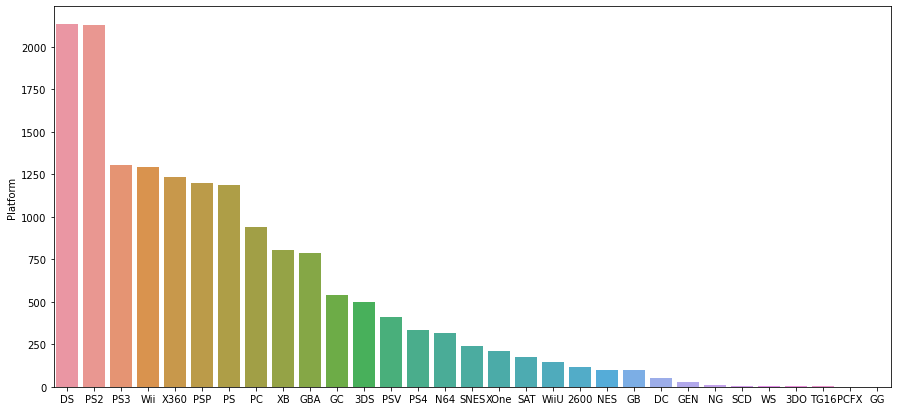

In [9]:
plt.figure(figsize=(15,7))
sns.barplot(df['Platform'].value_counts().index, df['Platform'].value_counts(), data=df)

As we can see third of the platforms have the majority of the games.


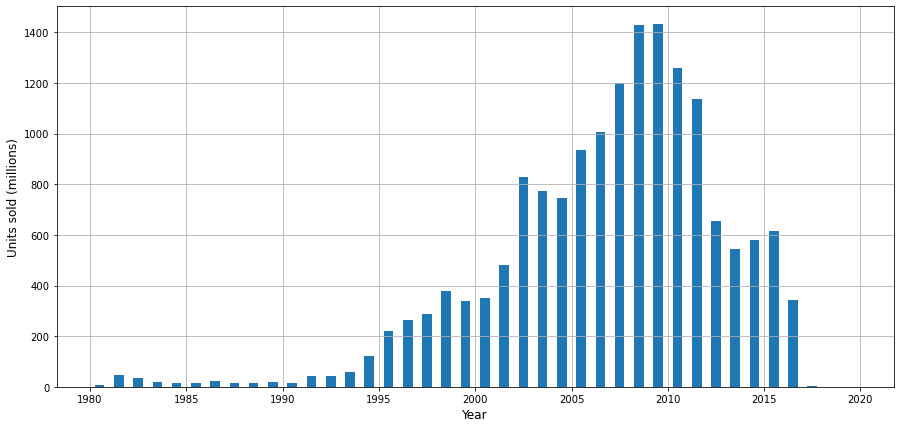

In [8]:
plt.figure(figsize=(15,7))
plt.xlabel('Year',fontsize=12)
plt.ylabel('Units sold (millions)', fontsize=12)
plt.hist(df['Year'],bins=[a for a in range(1980,2021)],rwidth=0.5)
plt.grid()
plt.show()

As we can see the majority the games released between 2000 to 2017. It seems the dataset not enough for the year after 2017

C:\Users\cgals\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


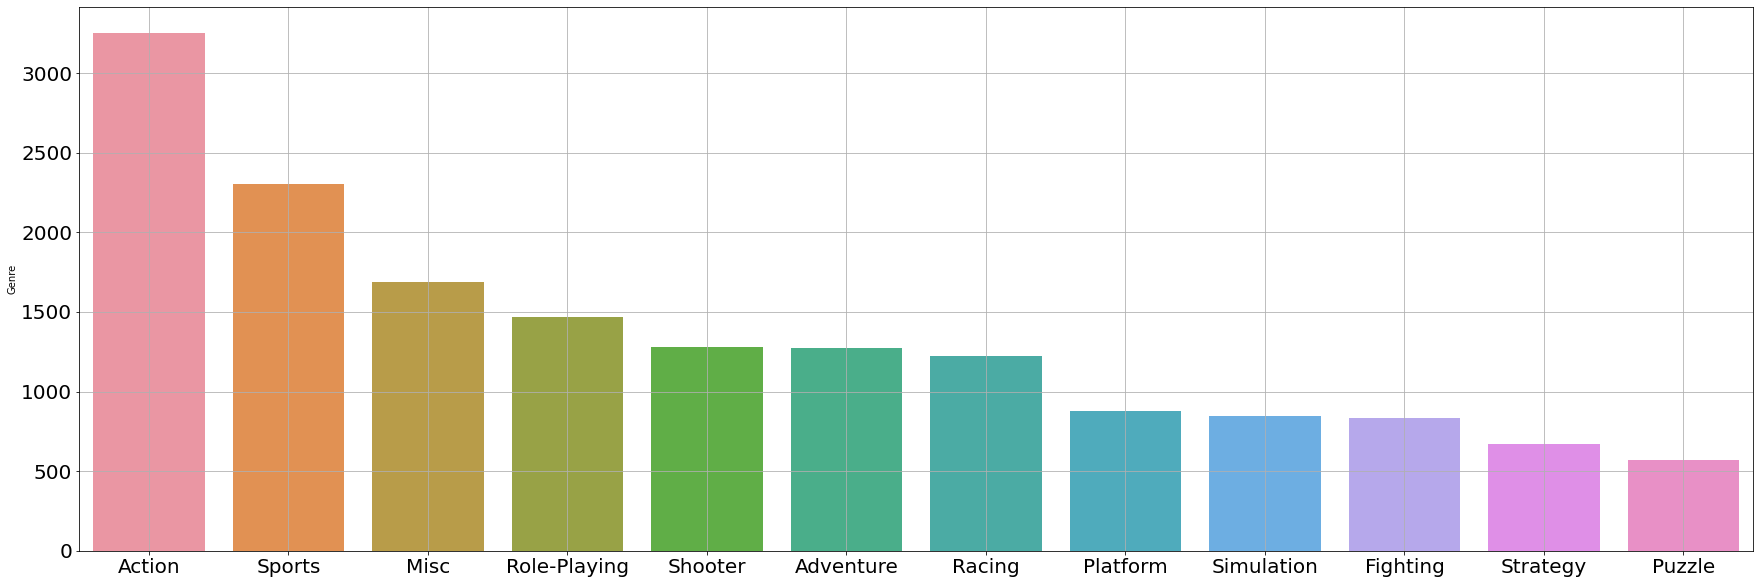

In [10]:
plt.figure(figsize=(30,10))
sns.barplot(df['Genre'].value_counts().index,df['Genre'].value_counts())

plt.xticks(fontsize=20) 
plt.yticks(fontsize=20) 
plt.grid()
plt.show()


The action and sport games have the highest no of sold games amongest the other games genre

# Game Publishers vs their games count


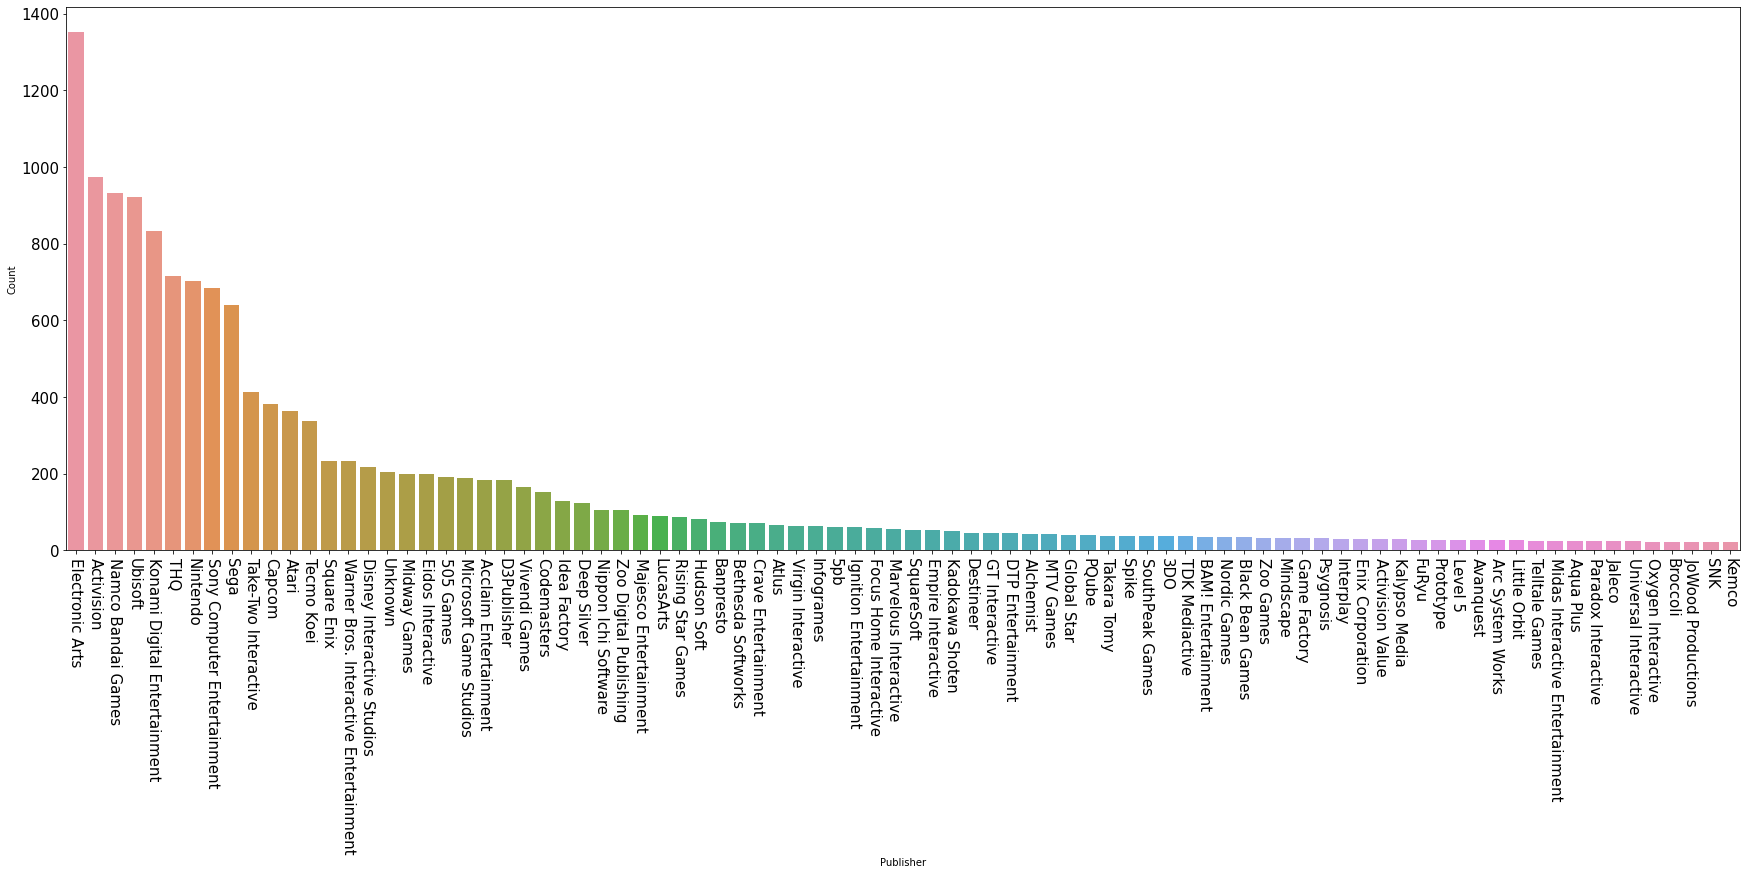

In [274]:

x=pd.DataFrame(data=df.Publisher.value_counts(), columns=['Publisher'])
x.reset_index(inplace=True)
x.rename(columns={'Publisher': 'Count','index':'Publisher'}, inplace=True)
plt.figure(figsize=(30,10))
x=x[x.Count>20]
sns.barplot(x=x.Publisher, y=x["Count"], label='Publisher')
plt.xticks(rotation=-90, fontsize=15) 
plt.yticks(fontsize=15) 

plt.show()

the above graph show those game Publishers with more than 20 games count. Most of the games are belong to few publishers

# 10 Highest Global_Sales game

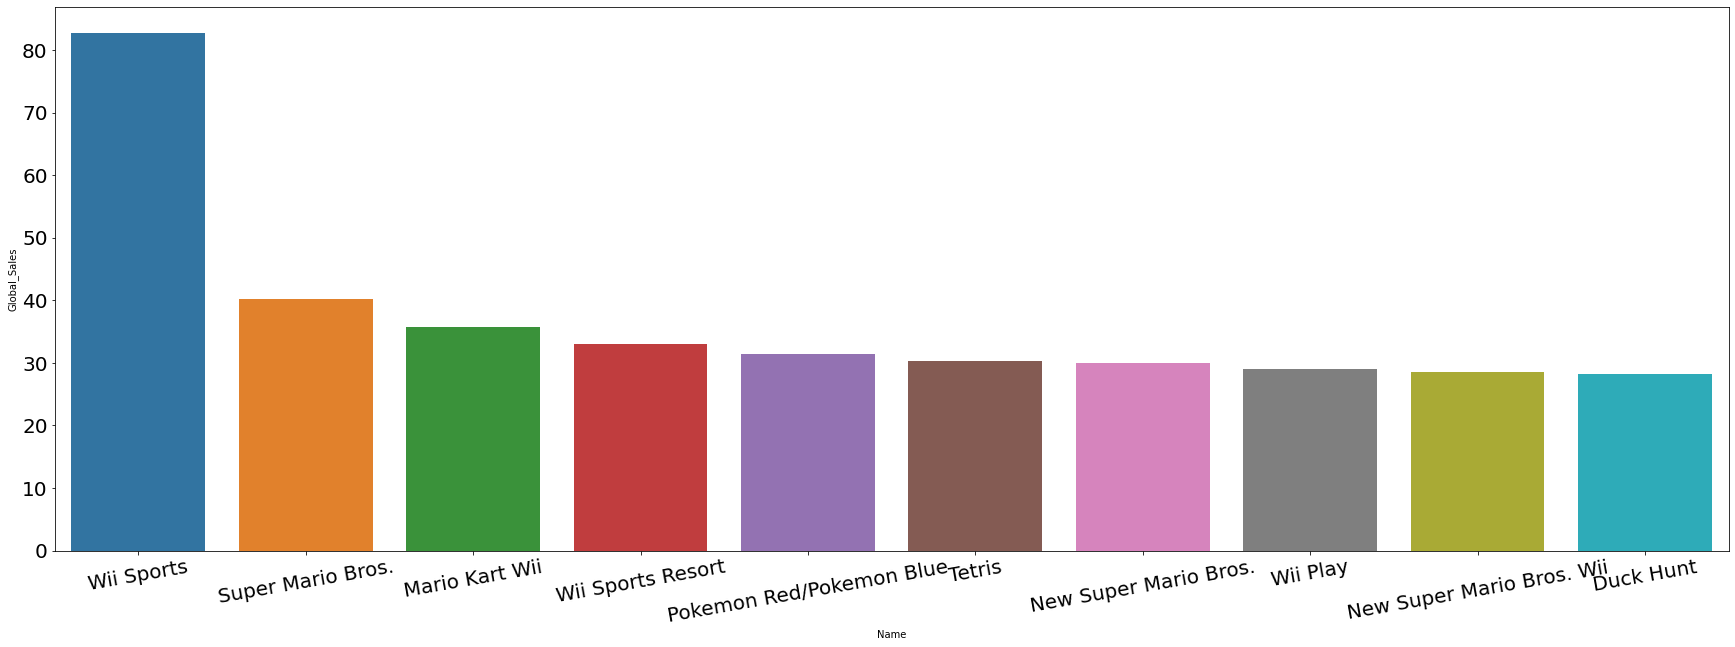

In [284]:
df_gsale=df[['Name','Global_Sales']].sort_values(by='Global_Sales',ascending=False)[:10]
plt.figure(figsize=(30,10))
sns.barplot(data=df_gsale, x='Name', y='Global_Sales')
plt.xticks(rotation= 10, fontsize=20) 
plt.yticks(fontsize=20) 
plt.show()

# Game Global Sales per Genre

<AxesSubplot:xlabel='Genre', ylabel='Global_Sales'>

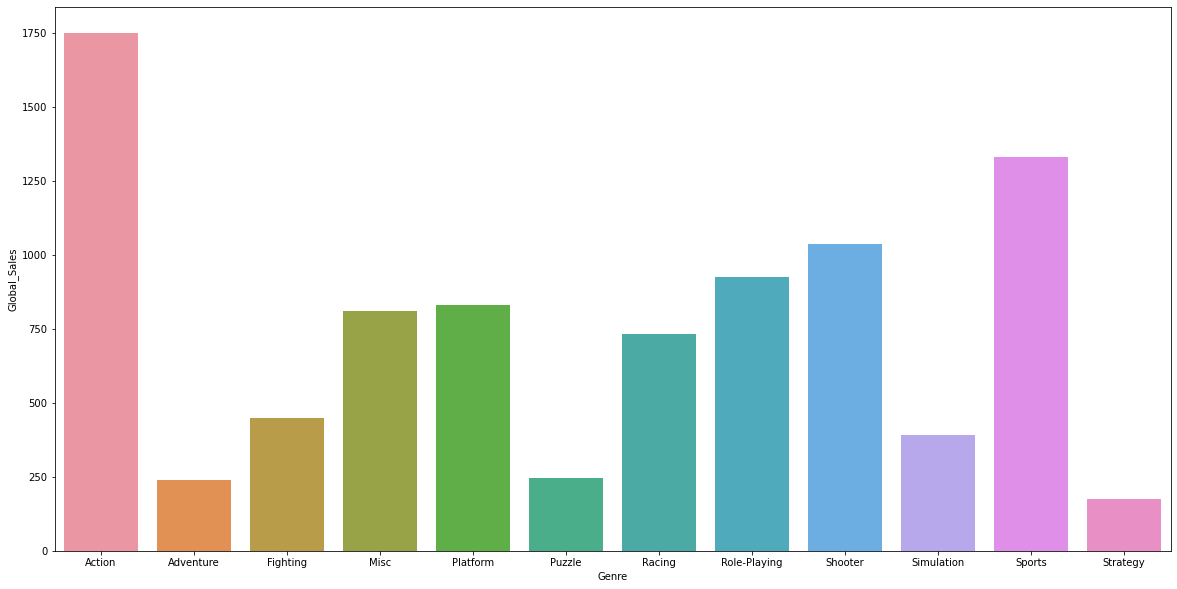

In [335]:
Genre_gsale = pd.DataFrame(df.groupby('Genre')['Global_Sales'].sum())
Genre_gsale.reset_index(inplace=True)
plt.figure(figsize=(20,10))
sns.barplot(data=Genre_gsale, x='Genre', y='Global_Sales')

The most game genre sold are Action and sports games

# Year vs Global sales plot


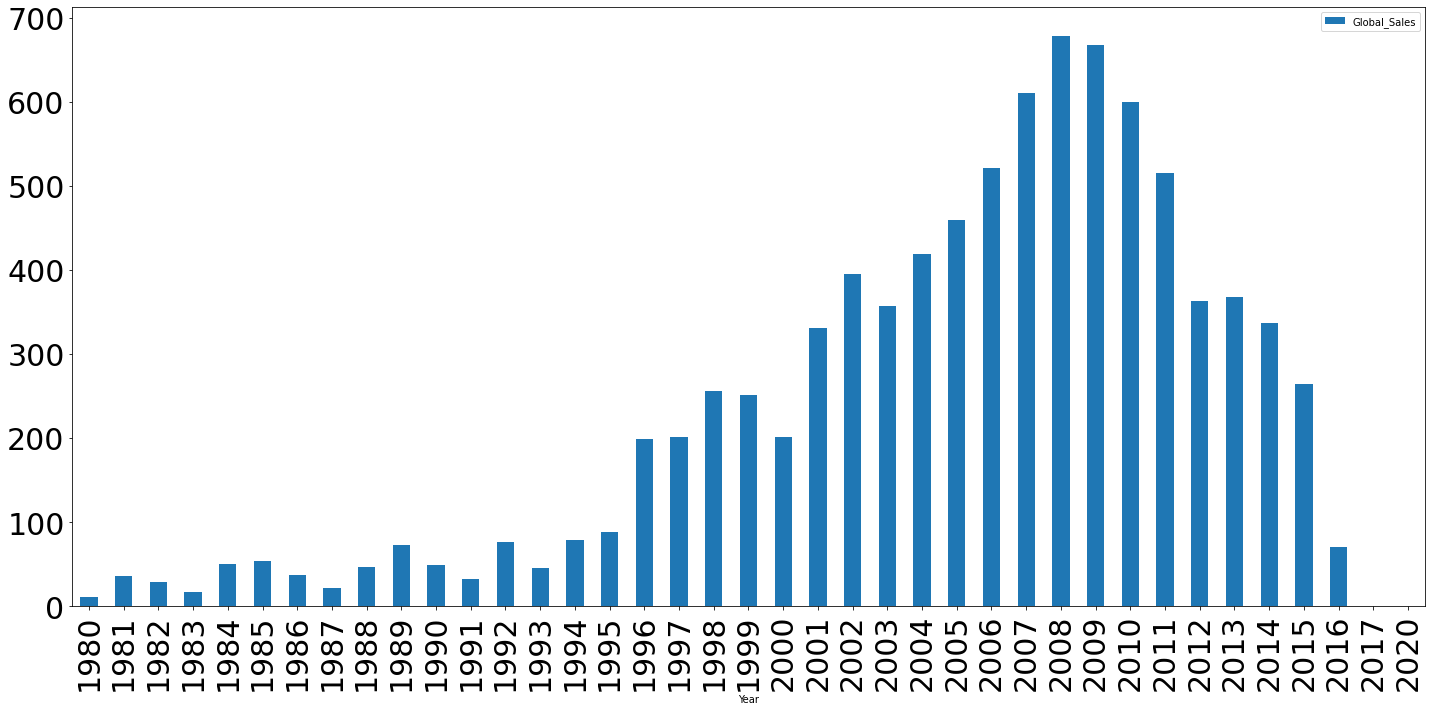

In [339]:
sales=df[['Year', 'Global_Sales']].groupby('Year').sum()
sales.index=sales.index.astype(int)
sales.plot.bar(figsize=(20,10),fontsize=30)
plt.tight_layout()
plt.show()

In [40]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Created wheel for pandas-profiling: filename=pandas_profiling-3.0.0-py2.py3-none-any.whl size=248506 sha256=130a7c24e3f94f0d69f84a1d646a976f615ed7db8eeb1110c4f8f415dca2c262
  Stored in directory: C:\Users\33659\AppData\Local\Temp\pip-ephem-wheel-cache-5z_8t7_z\wheels\64\b6\85\dfc808b23666a5910371784e349d28818006ff63ed9cfeca59
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27085 sha256=b9ca3b69ad2c834e93e7bdad9f06d55eefd54c5e7e78dc481e89292927948d34
  Stored in directory: c:\users\33659\appdata\local\pip\cache\wheels\23\14\6e\4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295198 sha256=ac329ccb858787f1be123407bb972bb94c1d80d259ea0dc0c310b146386d31a2
  Stored in directory: c:\users\33659\appdata\local\pip\cache\wheels\48\a1\7f\096c1269d6bf78d4768180602579b35a1e8cb1250bb4b40c74
Successfully built pandas-profiling htmlmin imagehash


In [80]:
from pandas_profiling import ProfileReport
report = ProfileReport(vg, title="Report", html={'style': {'full_width':True}}, explorative=True, missing_diagrams={'bar': True})

In [81]:
report.to_notebook_iframe()


Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [82]:
#Save the report in file
report.to_file("pandas_profiling_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]